\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('maroon_ipynb.mplstyle')  # custom MSU plotting style (really nice)

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 8253 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

#
## Given
Fatigue testing can take an appreciable amount of time.

## Find
Calculate the number of hours, days, or weeks it would take to apply $10^6$, $10^7$, and $10^8$ cycles for test frequencies of

A) 1 Hz (approximate speed of Wohler's original work). One of Wohler's tests ran for $1.3\cdot10^8$ cycles. How long did the test run?
B) 30 Hz (speed of many common test machines).
C) 150 Hz (speed of some rotating beam test machines).
D) 20 kHz at $10^8$, $10^9$, and $10^{10}$ cycles instead.

## Solution
If the elapsed time is $t$ (seconds), the following relationship is true:

$$t=\frac{N_f}{f}$$

where $N_f$ is the number of cycles till failure and $f$ is the testing frequency in Hz.

In [2]:
def t_elapsed(Nf_, f_, days=True):
    t_ = Nf_/f_
    if days:
        print(f'{t_*1/86_400: .3f} days')
    else:
        print(f'{t_*1/3600: .3f} hours')

### Part A

In [3]:
# 1, 10, and 100 million cycles at 1 Hz
t_elapsed(1e6, 1)
t_elapsed(1e7, 1)
t_elapsed(1e8, 1)

 11.574 days
 115.741 days
 1157.407 days


For $1.3\cdot10^8$ cycles,

In [4]:
t_elapsed(1.3e8, 1)

 1504.630 days


### Part B

In [5]:
# 1, 10, and 100 million cycles at 30 Hz
t_elapsed(1e6, 30, days=False)
t_elapsed(1e7, 30)
t_elapsed(1e8, 30)

 9.259 hours
 3.858 days
 38.580 days


### Part C

In [6]:
# 1, 10, and 100 million cycles at 150 Hz
t_elapsed(1e6, 150, days=False)
t_elapsed(1e7, 150, days=False)
t_elapsed(1e8, 150)

 1.852 hours
 18.519 hours
 7.716 days


### Part D

In [7]:
# 100, 1000, and 10000 million cycles at 20,000 Hz
t_elapsed(1e8, 20_000, days=False)
t_elapsed(1e9, 20_000, days=False)
t_elapsed(1e10, 20_000)

 1.389 hours
 13.889 hours
 5.787 days


\pagebreak
\begin{center}
\begin{tabular}{ccc}
ME 8253 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

#
## Given
An as-forged 2 inch diameter 1040 steel rod has an ultimate tensile strength $S_u$ of 100 ksi and a yield strength $S_y$ of 75 ksi and is subjected to constant amplitude cyclic bending.

## Find
Determine the following using appropriate approximation models:

A) the fully reversed fatigue strength at $10^6$ cycles
B) $S_a$ and $S_m$ for $10^6$ cycles if $R=-0.2$
C) $S_a$ and $S_m$ for $10^4$ cycles if $R=0.2$
D) Plot the Constant Life Diagram for A and B. Use the yield strength $S_y$ value for $S^\prime_y$. Plot the constant stress ratio lines on the diagram.

## Solution
We use Basquin's equation to find the fatigue strength at some cycle number,

$$S_{Nf}=A(N_f)^B$$

$A$ and $B$ maybe determined by assuming the following boundary conditions:

* At 1 cycle, the fatigue strength is the tensile stress (100 ksi)
* At $10^6$ cycles, the fatigue strength is the endurance limit

$S_{Nf}$ is for fully reversed cycles. The Goodman relationship is used to characterize the loading conditions for when the mean stress is not zero,

$$\frac{S_a}{S_{Nf}}+\frac{S_m}{S_u}=1$$

**Finding the Endurance Limit**

The starting endurance limit is approximated as $0.5S_u=50\,ksi$. Since the size of the rod is large, a correction factor of 0.8 will be applied (page 80 in the text) as well as a factor of 0.35 from the surface finish below.

\begin{center}
\includegraphics{images/Figure 1}
\end{center}

Therefore,

$$S_f=0.35\cdot0.8\cdot50=14\,ksi$$

The first condition is used to determine $A$ in the Basquin equation ($A=100$). The second condition results in $B=\frac{1}{6}\log\left(\frac{S_f}{S_u}\right)=-0.14$.

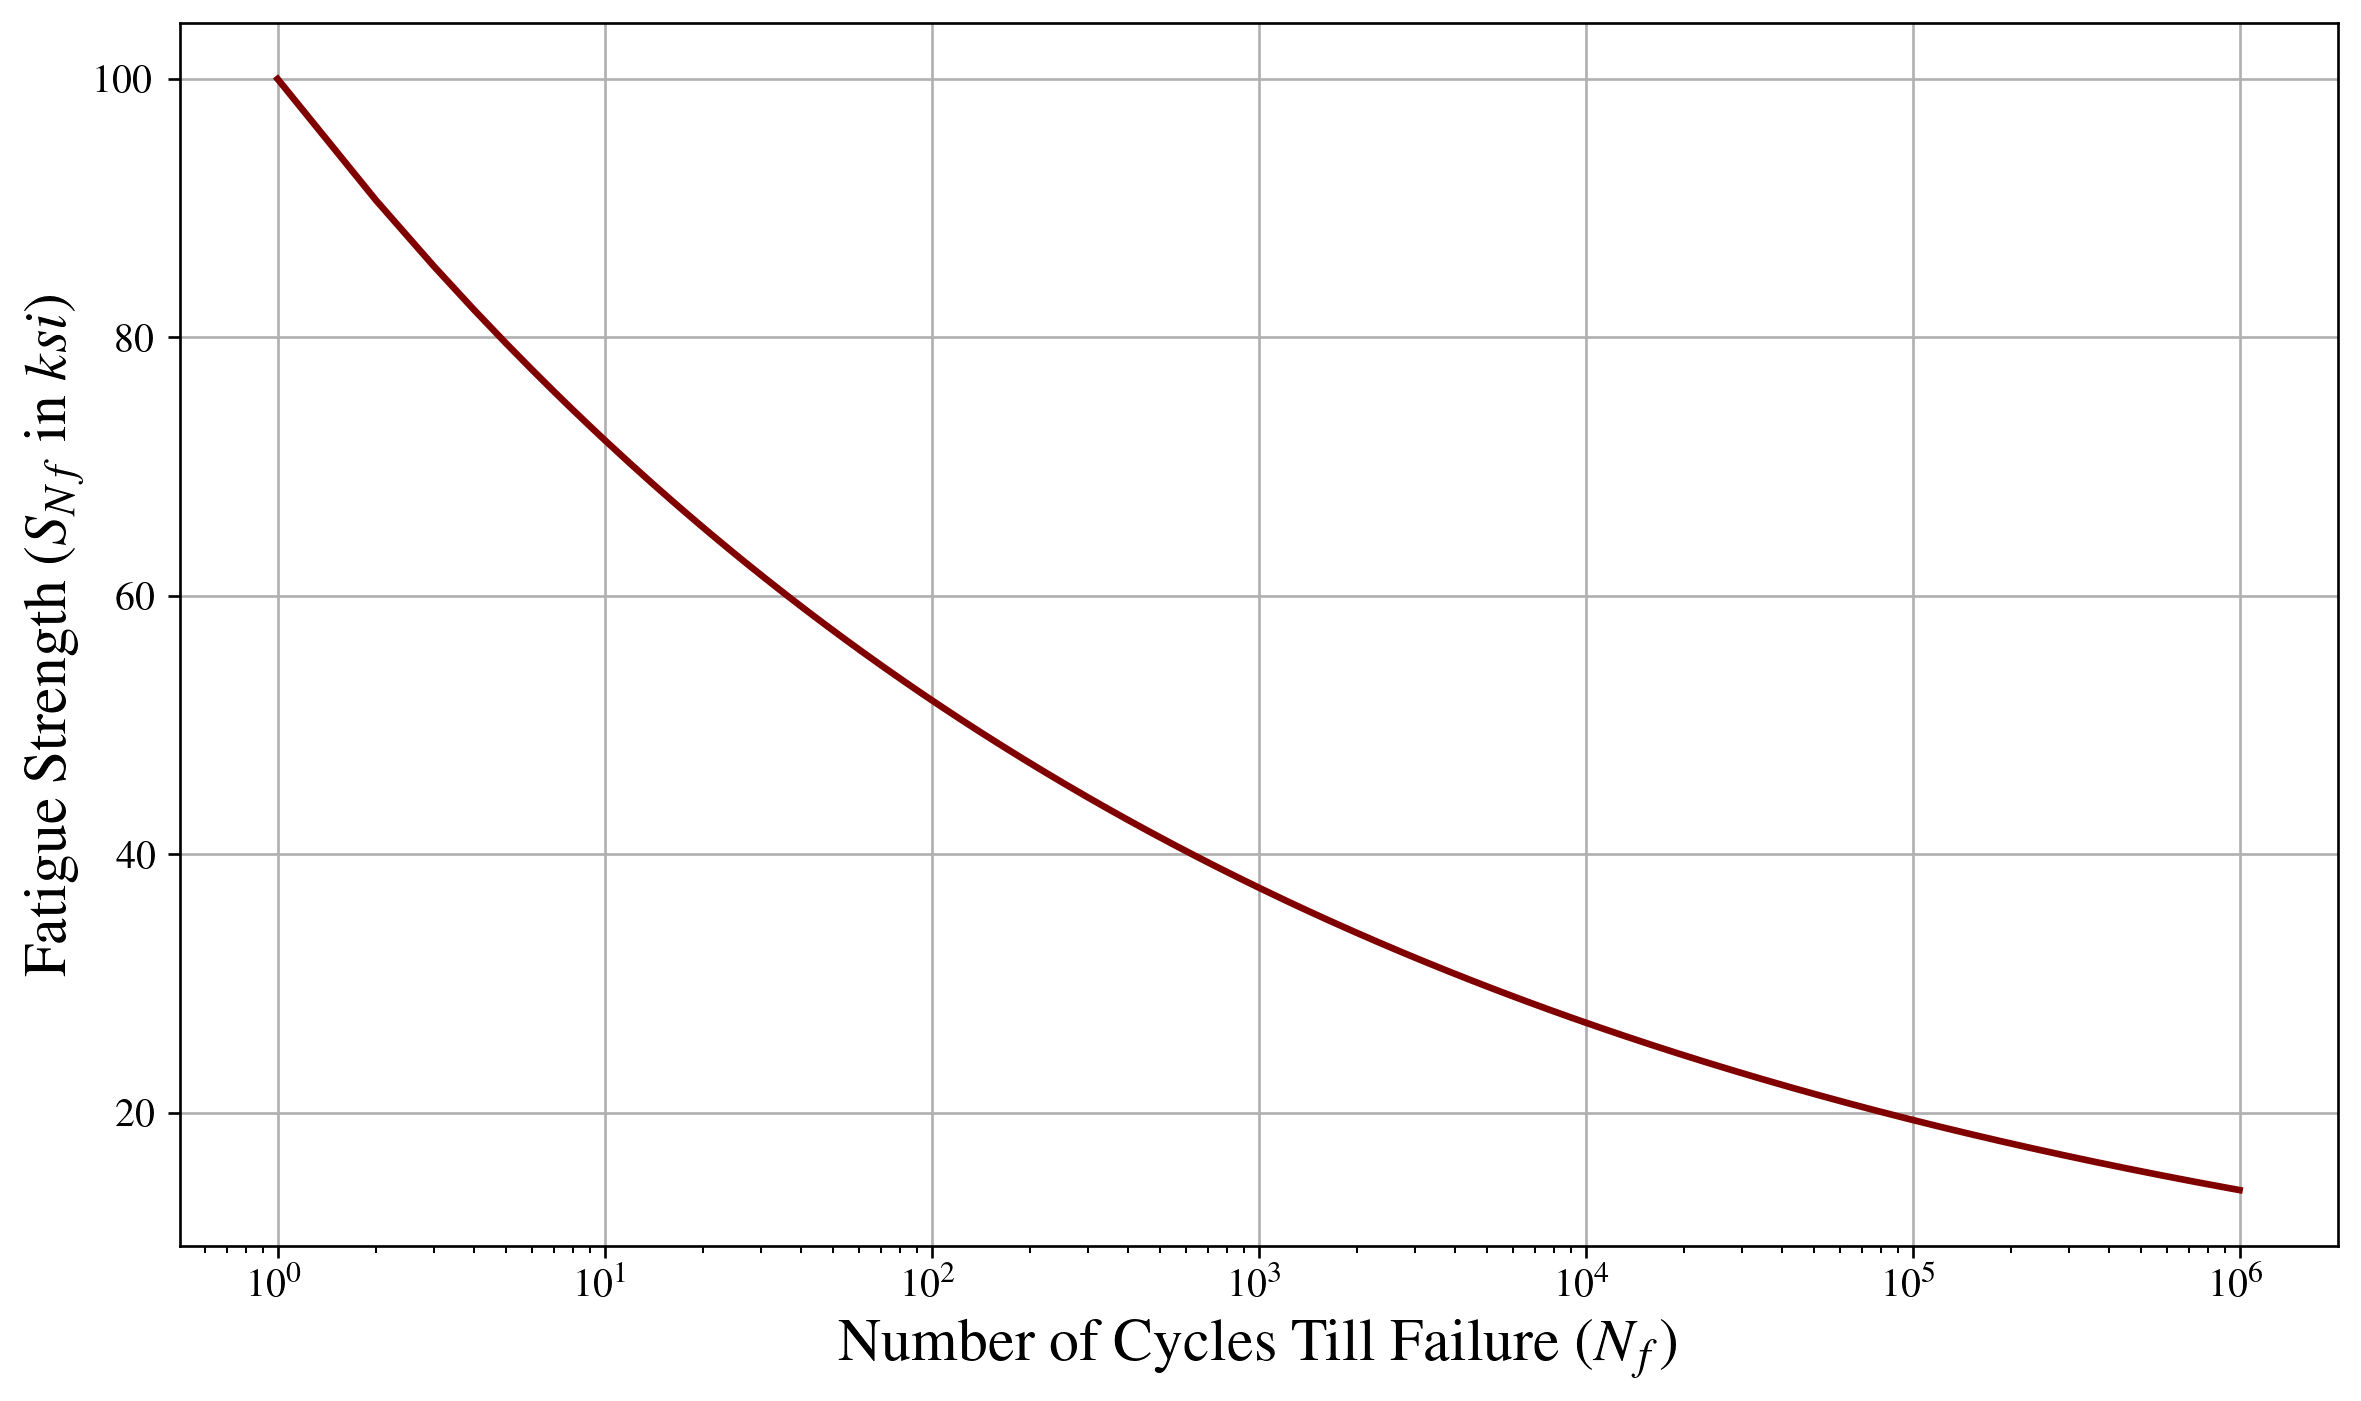

In [8]:
# Plotting the Basquin curve
A, B = 100, 1/6*np.log10(14/100)

Nf = np.linspace(1, 1_000_000, 1_000_000)
S_Nf = lambda Nf_: A*Nf_**B

fig, ax = plt.subplots()
ax.set_xlabel('Number of Cycles Till Failure ($N_f$)')
ax.set_ylabel('Fatigue Strength ($S_{Nf}$ in $ksi$)')
ax.set_xscale('log')
# ax.set_yscale('log')

ax.plot(Nf, S_Nf(Nf))
plt.show()

### Part A
The fully reversed fatigue strength at $10^6$ cycles is the fatigue limit, since this analysis used the common assumption that the fatigue limit is reached at 1 million cycles. Therefore, the fully reversed fatigue strength is 14 ksi for 1 million cycles.

### Part B
The Goodman relationship along with the three additional equations below yield four equations and four unknowns.

In [9]:
S_min, S_max, S_a, S_m = sp.symbols('S_{min} S_{max} S_a S_m')

eq1 = sp.Eq(S_a/14 + S_m/100, 1)
eq2 = sp.Eq(sp.S('-0.2'), S_min/S_max)
eq3 = sp.Eq(S_max, S_m + S_a)
eq4 = sp.Eq(S_m, (S_max + S_min)/2)

display(eq1, eq2, eq3, eq4)

Eq(S_a/14 + S_m/100, 1)

Eq(-0.2, S_{min}/S_{max})

Eq(S_{max}, S_a + S_m)

Eq(S_m, S_{max}/2 + S_{min}/2)

In [10]:
# Solving
sol = sp.solve([eq1, eq2, eq3, eq4], dict=True)[0]
for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(S_a, 12.8048780487805)

Eq(S_m, 8.53658536585366)

Eq(S_{max}, 21.3414634146341)

Eq(S_{min}, -4.26829268292683)

### Part C

In [11]:
# Get S_Nf
S_Nf(1e4)  # ksi

26.961994997758502

The process above is repeated with slightly different values. The value of the fatigue strength at $10^4$ cycles is $S_{Nf}=27\,ksi$.

In [12]:
S_min, S_max, S_a, S_m = sp.symbols('S_{min} S_{max} S_a S_m')

eq1 = sp.Eq(S_a/27 + S_m/100, 1)
eq2 = sp.Eq(sp.S('0.2'), S_min/S_max)
eq3 = sp.Eq(S_max, S_m + S_a)
eq4 = sp.Eq(S_m, (S_max + S_min)/2)

display(eq1, eq2, eq3, eq4)

Eq(S_a/27 + S_m/100, 1)

Eq(0.2, S_{min}/S_{max})

Eq(S_{max}, S_a + S_m)

Eq(S_m, S_{max}/2 + S_{min}/2)

In [13]:
# Solving
sol = sp.solve([eq1, eq2, eq3, eq4], dict=True)[0]
for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(S_a, 19.2170818505338)

Eq(S_m, 28.8256227758007)

Eq(S_{max}, 48.0427046263345)

Eq(S_{min}, 9.6085409252669)

### Part D
The function below will create a constant life diagram. Automating this process may prove to be useful in the future.

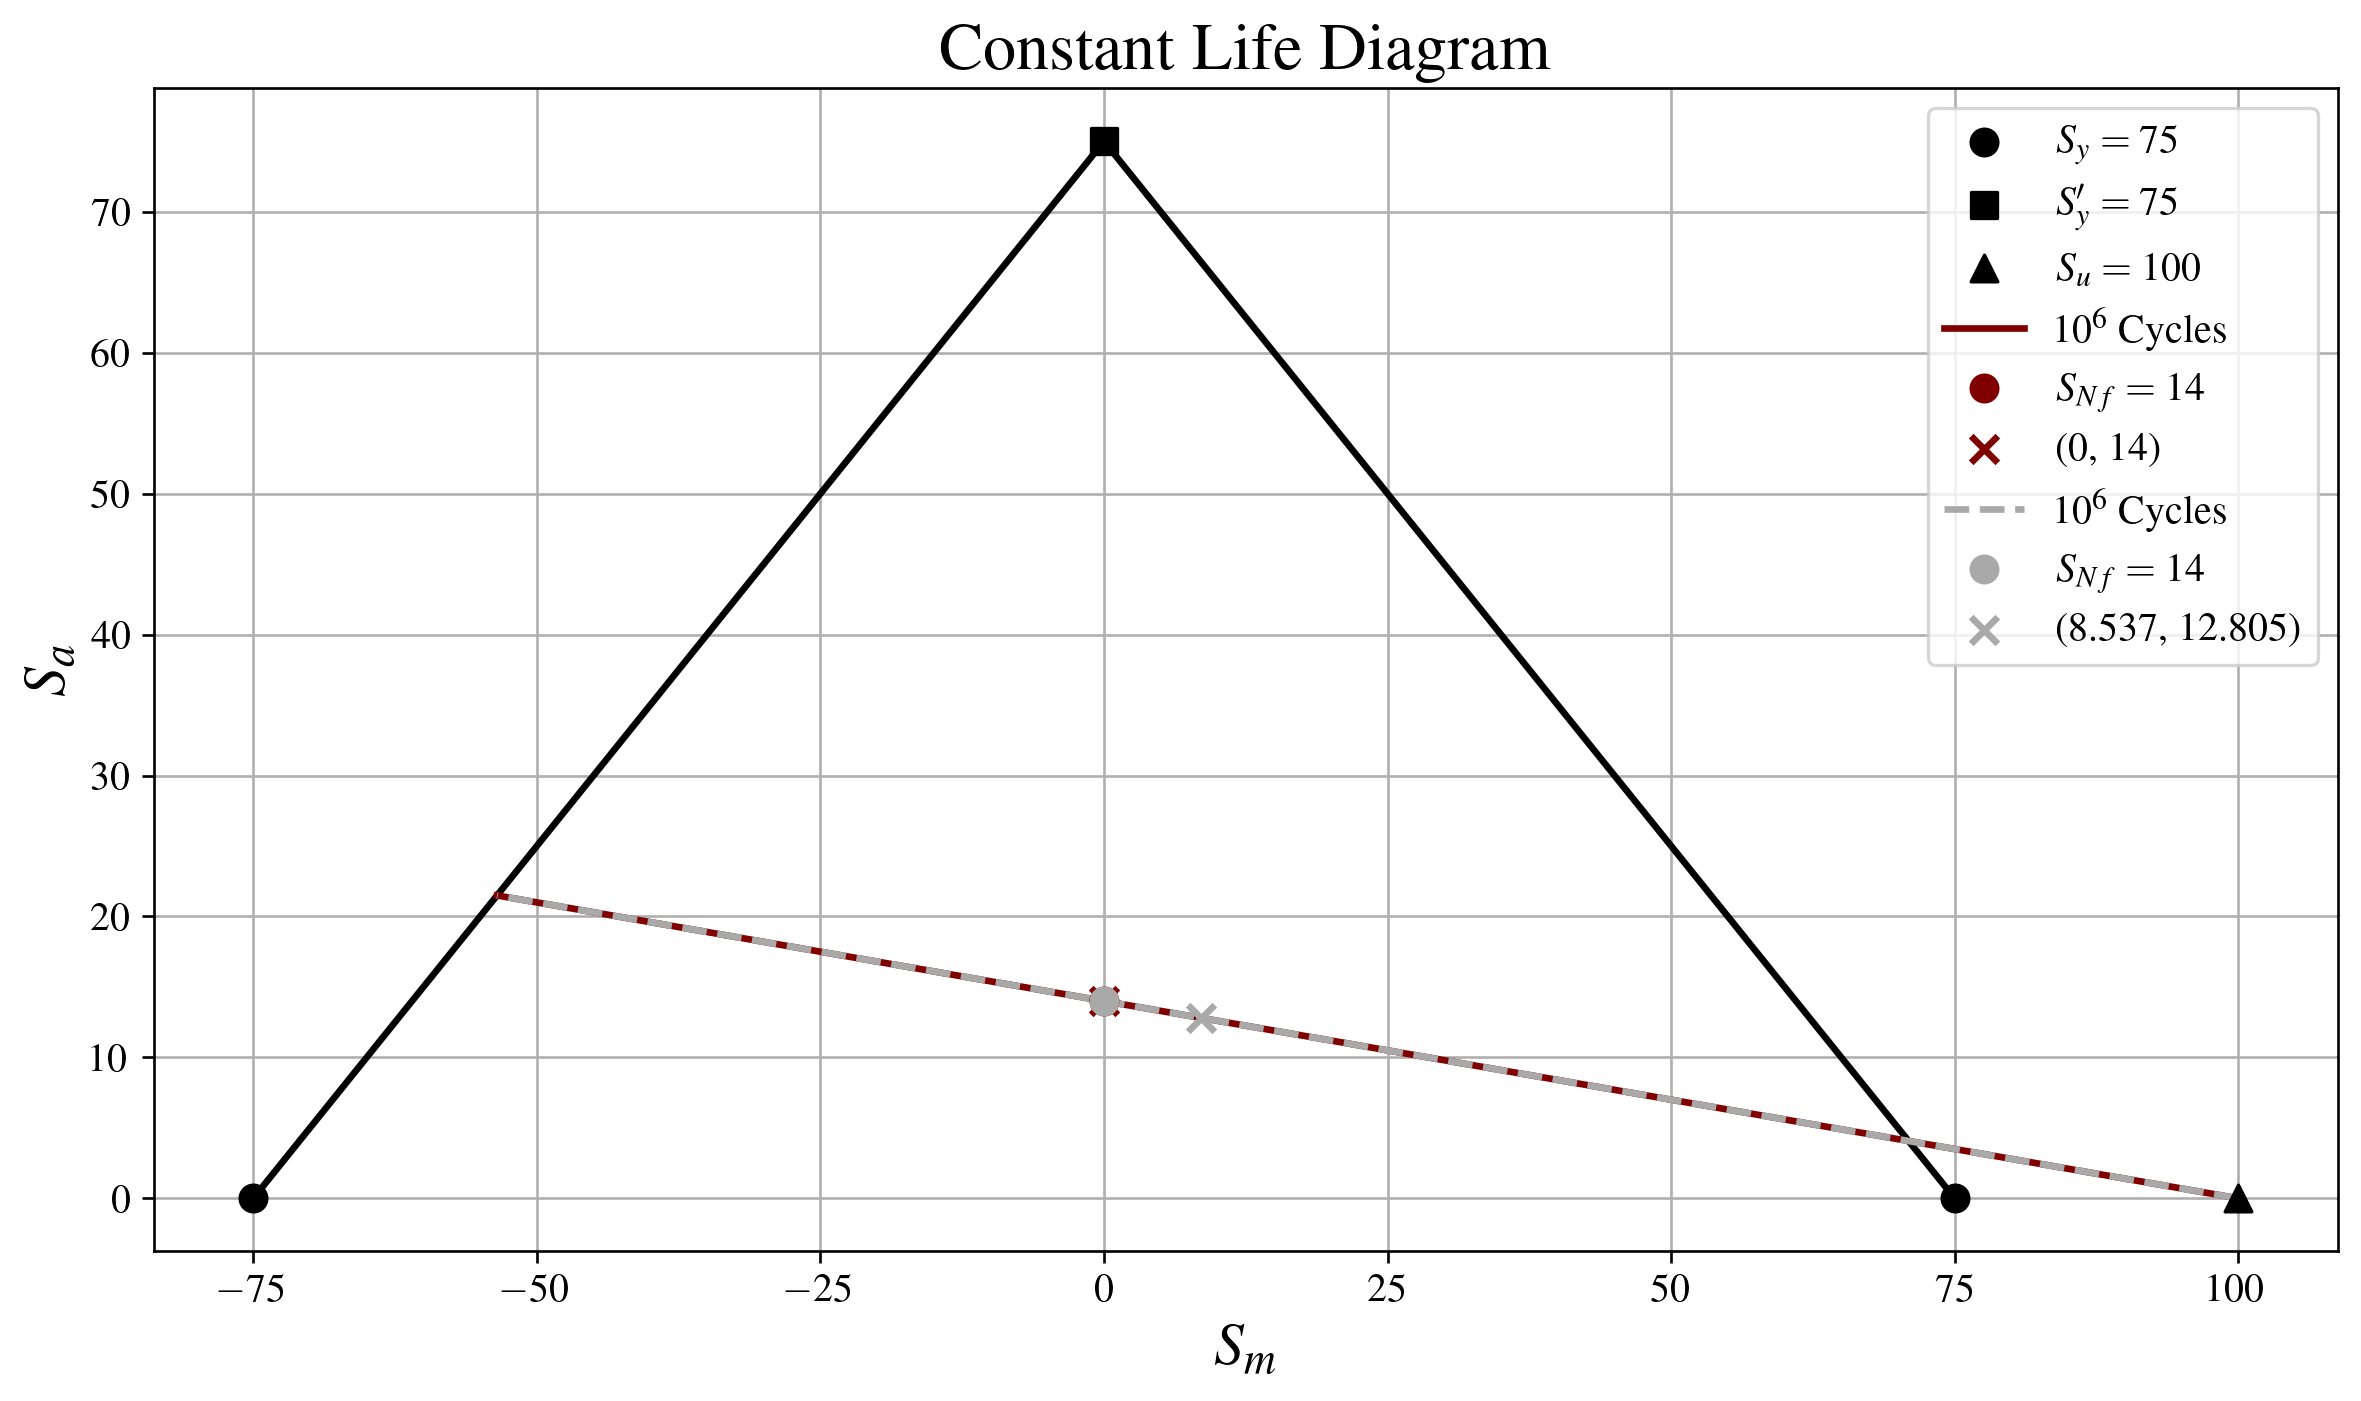

In [14]:
def constant_life(Sy_, Sy_p, Su_, *lines):
    # lines needs to be a dictionary containing the following keys:
    # S_Nf, S_m, S_a, cycles, ls (optional), and color
    fig_, ax_ = plt.subplots()
    ax_.set_xlabel('$S_m$')
    ax_.set_ylabel('$S_a$')
    ax_.set_title('Constant Life Diagram')

    # Plot Triangle
    ax_.plot([Sy_, 0], [0, Sy_p], color='black', zorder=2)
    ax_.plot([-Sy_, 0], [0, Sy_p], color='black', zorder=2)
    ax_.scatter([Sy_, -Sy_], [0, 0], color='black', zorder=3, label=f'$S_y={Sy_}$', marker='o')
    ax_.scatter(0, Sy_p, color='black', marker='s', zorder=3, label=rf'$S^\prime_y={Sy_p}$')
    ax_.scatter(Su_, 0, color='black', marker='^', zorder=3, label=f'$S_u={Su_}$')

    # Plot line information
    for line in lines:
        x_ = (line['S_Nf'] - Sy_p)/(Sy_p/Sy_ + line['S_Nf']/Su_)
        ax_.plot([Su_, x_], [0, Sy_p/Sy_*x_ + Sy_p], color=line['color'], zorder=2, label=f"{line['cycles']} Cycles", ls=line.get('ls'))
        ax_.scatter(0, line['S_Nf'], label=f'$S_{{Nf}}={line["S_Nf"]}$', zorder=3, marker='o', color=line['color'])
        ax_.scatter(line['S_m'], line['S_a'], color=line['color'], zorder=3, marker='x', label=f'{line["S_m"], line["S_a"]}')

    ax_.legend()

    return fig_, ax_

line1 = dict(S_Nf=14, S_m=0, S_a=14, cycles=r'$10^6$', color='maroon')
line2 = dict(S_Nf=14, S_m=8.537, S_a=12.805, cycles=r'$10^6$', color='darkgrey', ls='--')
constant_life(75, 75, 100, line1, line2)
plt.show()

The points are below the yielding lines indicating that failure will not occur.

\pagebreak
\begin{center}
\begin{tabular}{ccc}
ME 8253 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

#
## Given and Find
Repeat the previous problem, but using a machined surface. Comment on the effect of the surface.

## Solution
All the information is the same except the endurance limit will change significantly.

\begin{center}
\includegraphics{images/Figure 2}
\end{center}

The new endurance limit is $S_f=0.75\cdot0.8\cdot50=30\,ksi$.

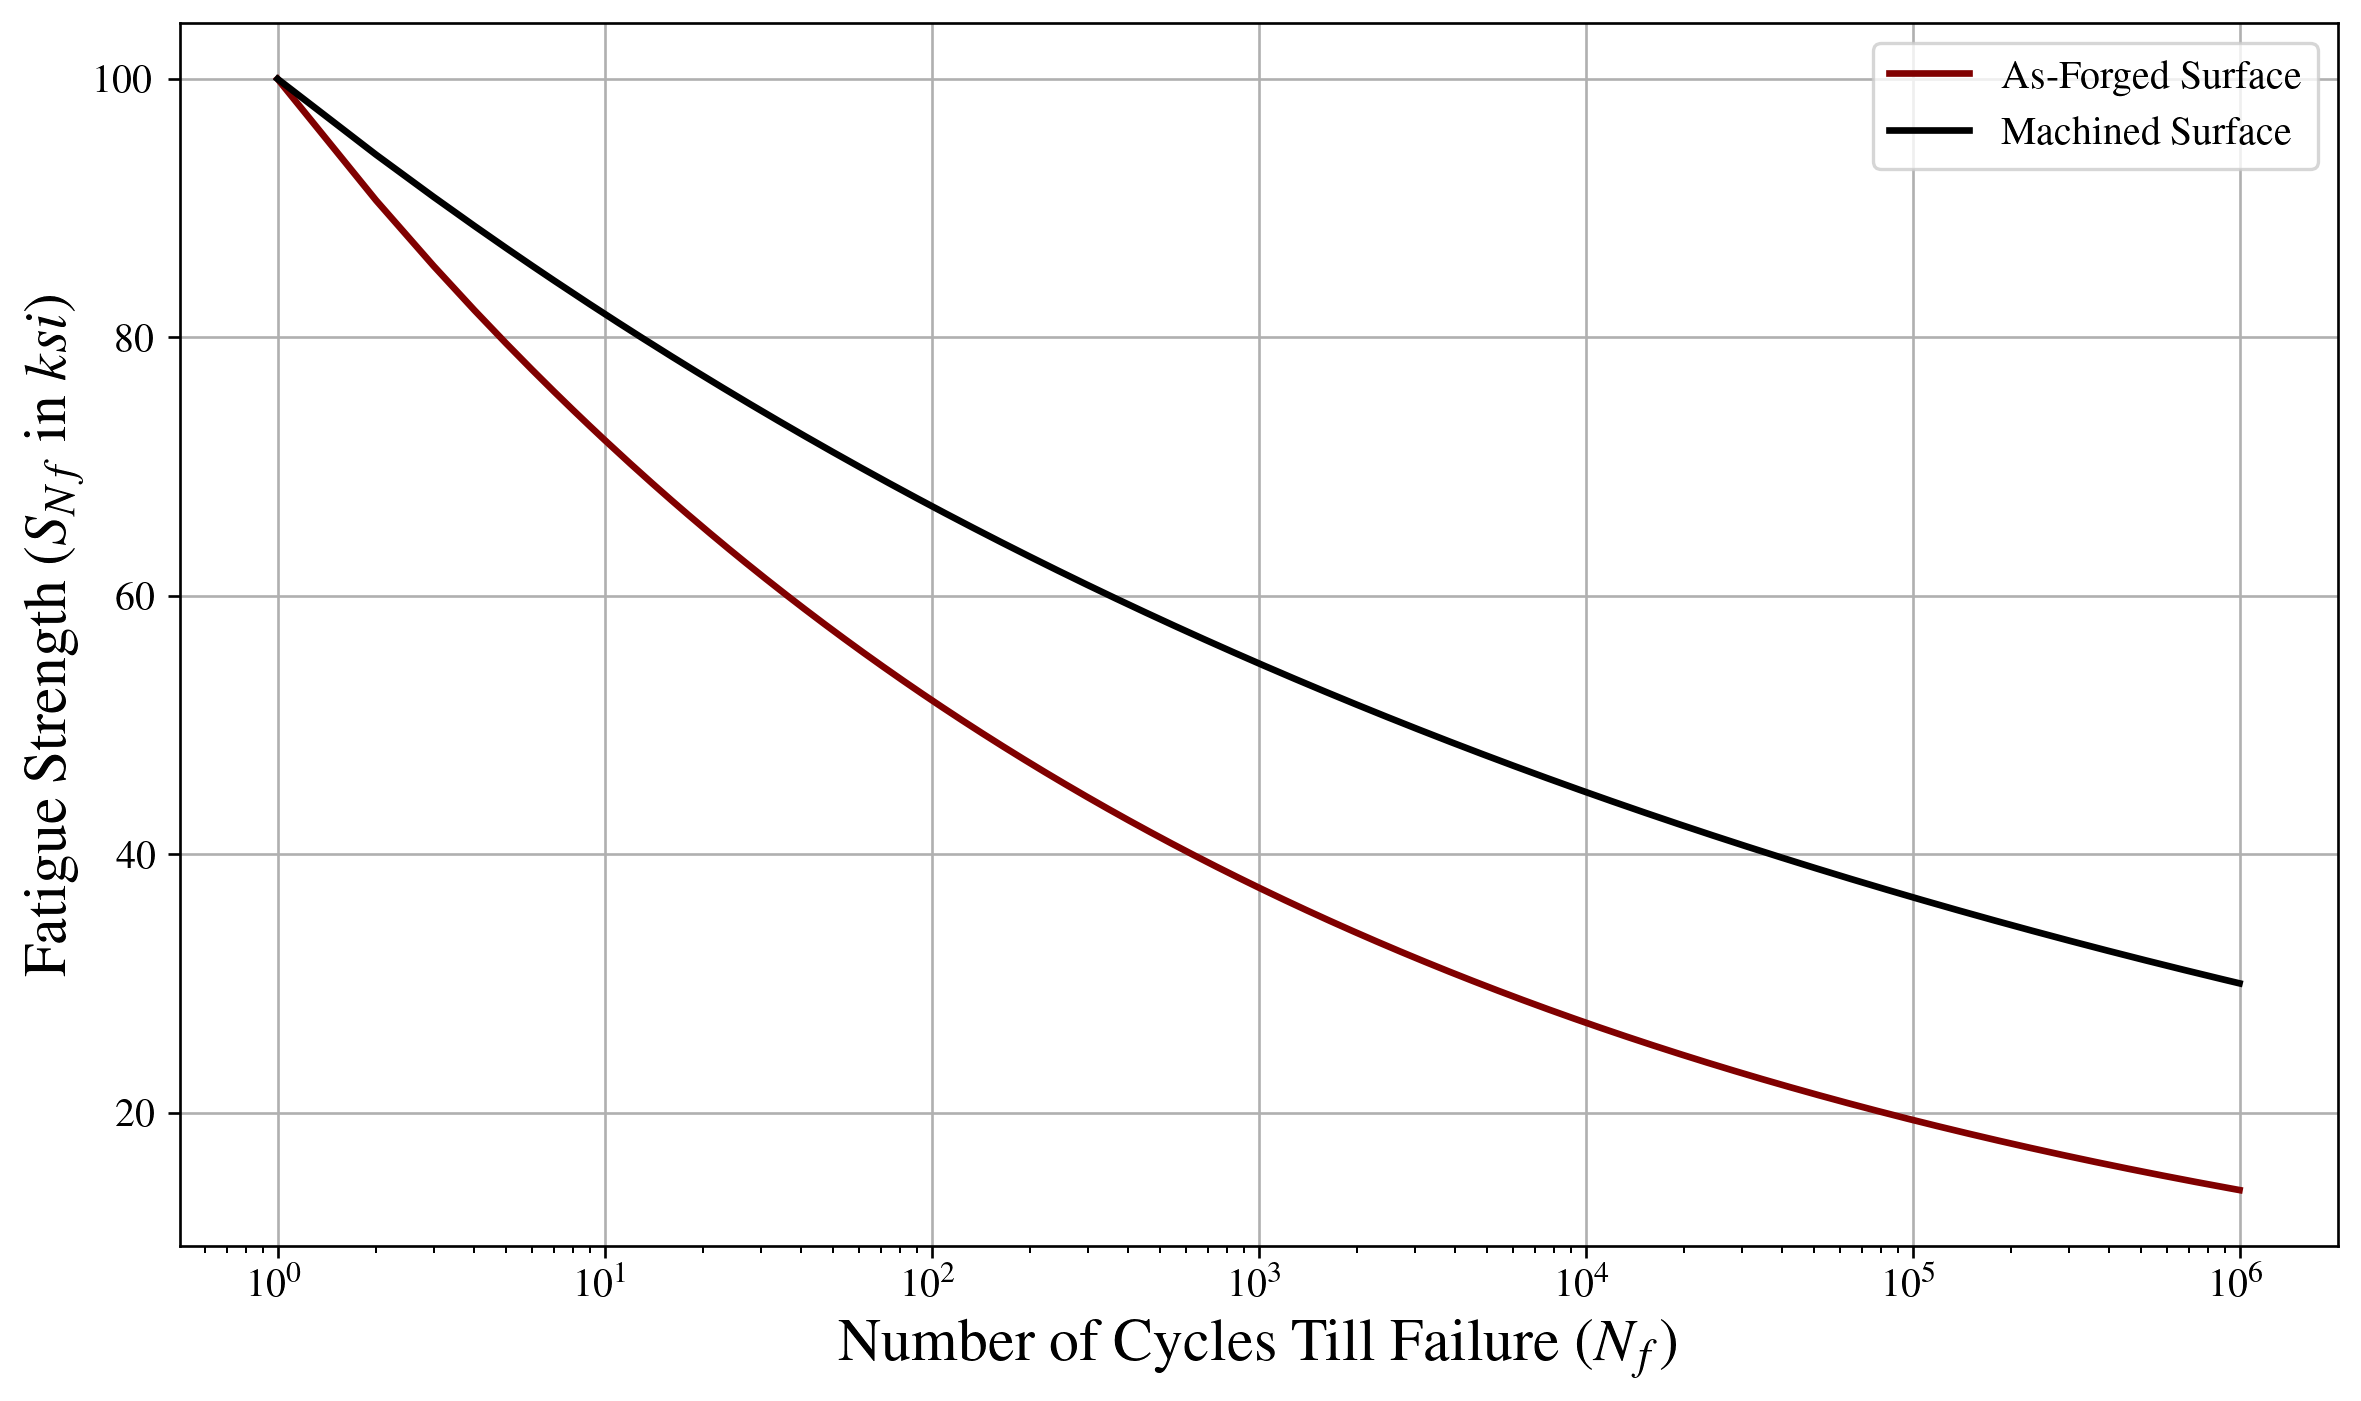

In [15]:
# Plotting and comparing the curves
A, B2 = 100, 1/6*np.log10(30/100)

S_Nf2 = lambda Nf_: A*Nf_**B2

fig, ax = plt.subplots()
ax.set_xlabel('Number of Cycles Till Failure ($N_f$)')
ax.set_ylabel('Fatigue Strength ($S_{Nf}$ in $ksi$)')
ax.set_xscale('log')
# ax.set_yscale('log')

ax.plot(Nf, S_Nf(Nf), label='As-Forged Surface')
ax.plot(Nf, S_Nf2(Nf), label='Machined Surface')
ax.legend()
plt.show()

### Part A
The fully reversed fatigue strength is 30 ksi for 1 million cycles, since it's common for metals to reach the fatigue limit at 1 million cycles.

### Part B

In [16]:
eq1 = sp.Eq(S_a/30 + S_m/100, 1)
eq2 = sp.Eq(sp.S('-0.2'), S_min/S_max)
eq3 = sp.Eq(S_max, S_m + S_a)
eq4 = sp.Eq(S_m, (S_max + S_min)/2)

display(eq1, eq2, eq3, eq4)

Eq(S_a/30 + S_m/100, 1)

Eq(-0.2, S_{min}/S_{max})

Eq(S_{max}, S_a + S_m)

Eq(S_m, S_{max}/2 + S_{min}/2)

In [17]:
# Solving
sol = sp.solve([eq1, eq2, eq3, eq4], dict=True)[0]
for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(S_a, 25.0)

Eq(S_m, 16.6666666666667)

Eq(S_{max}, 41.6666666666667)

Eq(S_{min}, -8.33333333333333)

### Part C

In [18]:
S_Nf2(1e4)  # ksi

44.81404746557165

In [19]:
eq1 = sp.Eq(S_a/sp.S('44.814') + S_m/100, 1)
eq2 = sp.Eq(sp.S('0.2'), S_min/S_max)
eq3 = sp.Eq(S_max, S_m + S_a)
eq4 = sp.Eq(S_m, (S_max + S_min)/2)

display(eq1, eq2, eq3, eq4)

Eq(0.022314455304146*S_a + S_m/100, 1)

Eq(0.2, S_{min}/S_{max})

Eq(S_{max}, S_a + S_m)

Eq(S_m, S_{max}/2 + S_{min}/2)

In [20]:
# Solving
sol = sp.solve([eq1, eq2, eq3, eq4], dict=True)[0]
for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(S_a, 26.7992656424732)

Eq(S_m, 40.1988984637097)

Eq(S_{max}, 66.9981641061829)

Eq(S_{min}, 13.3996328212366)

### Part D

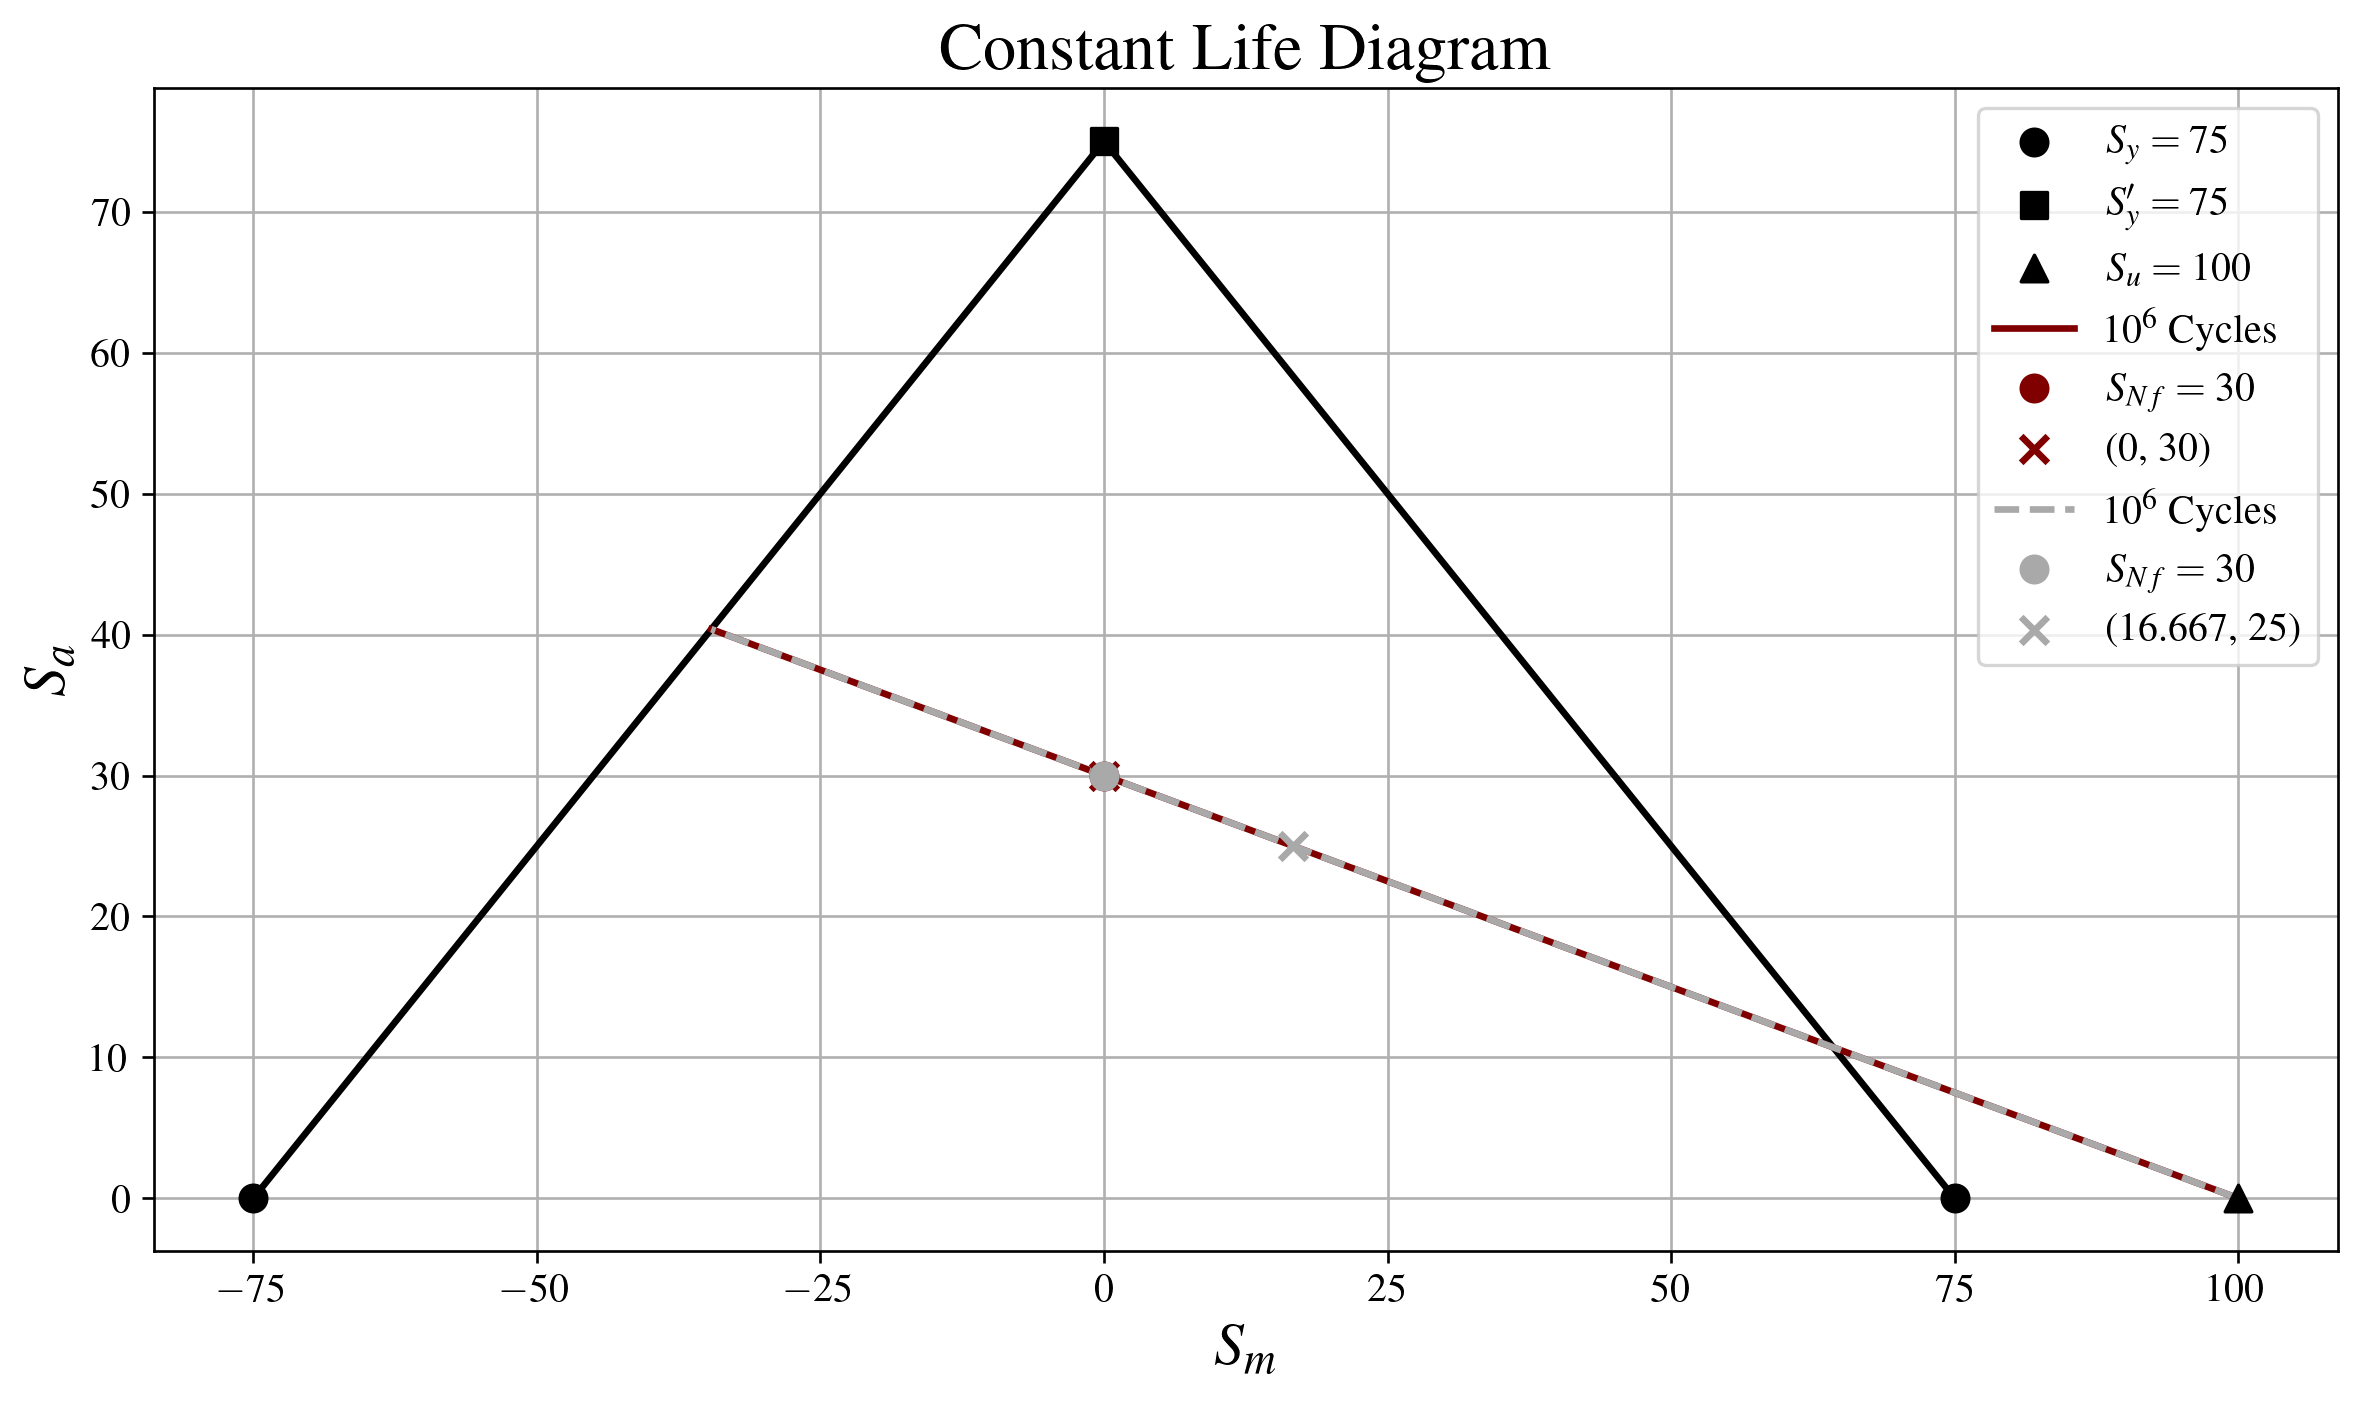

In [21]:
line1 = dict(S_Nf=30, S_m=0, S_a=30, cycles=r'$10^6$', color='maroon')
line2 = dict(S_Nf=30, S_m=16.667, S_a=25, cycles=r'$10^6$', color='darkgrey', ls='--')
constant_life(75, 75, 100, line1, line2)
plt.show()

The effect of machining the surface is that the endurance limit is increased significantly. As seen from the S-N diagram, the increase in the endurance limit decreases the rate of stress with respect to the number of cycles. That is, infinite life is far more achievable, and the material will not fail in higher stress environments.